# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [2]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [3]:
df_tesla.shape
df_tesla.columns
max = df_tesla.TSLA_WEB_SEARCH.max()
min = df_tesla.TSLA_WEB_SEARCH.min()

In [4]:
print(f'Largest value for Tesla in Web Search: {max}')
print(f'Smallest value for Tesla in Web Search: {min}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


### Unemployment Data

In [5]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [6]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ')

Largest value for "Unemployemnt Benefits" in Web Search: 


### Bitcoin

In [7]:
df_unemployment.UE_BENEFITS_WEB_SEARCH.max()

100

In [8]:

max_val = df_btc_search.BTC_NEWS_SEARCH.max()


In [9]:
print(f'largest BTC News Search:{max_val}')

largest BTC News Search:100


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [27]:
val = df_btc_price.isna().values.sum()
val_1 = df_unemployment.isna().values.sum()
val_2 = df_btc_search.isna().values.sum()
val_3 = df_tesla.isna().values.sum()

print(f'Missing values for Tesla?:{val_3} ')
print(f'Missing values for U/E?: {val_1}')
print(f'Missing values for BTC Search?:{val_2} ')

Missing values for Tesla?:0 
Missing values for U/E?: 0
Missing values for BTC Search?:0 


In [11]:
print(f'Number of missing values in bitcoin price:{val}')

Number of missing values:2


**Challenge**: Remove any missing values that you found.

In [12]:
df_btc_price = df_btc_price.dropna()

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [13]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [14]:
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [15]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_price.head()
df_btc_price.DATE

,DATE
0,2014-09-17
1,2014-09-18
2,2014-09-19
3,2014-09-20
4,2014-09-21
...,...
2199,2020-09-24
2200,2020-09-25
2201,2020-09-26
2202,2020-09-27


### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [16]:
df_btc_monthly = df_btc_price.resample("M",on = "DATE").last()
df_btc_monthly.head()

<ipython-input-16-3ab345b84958>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample("M",on = "DATE").last()


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


# Data Visualisation

### Notebook Formatting & Style Helpers

In [17]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')


In [18]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

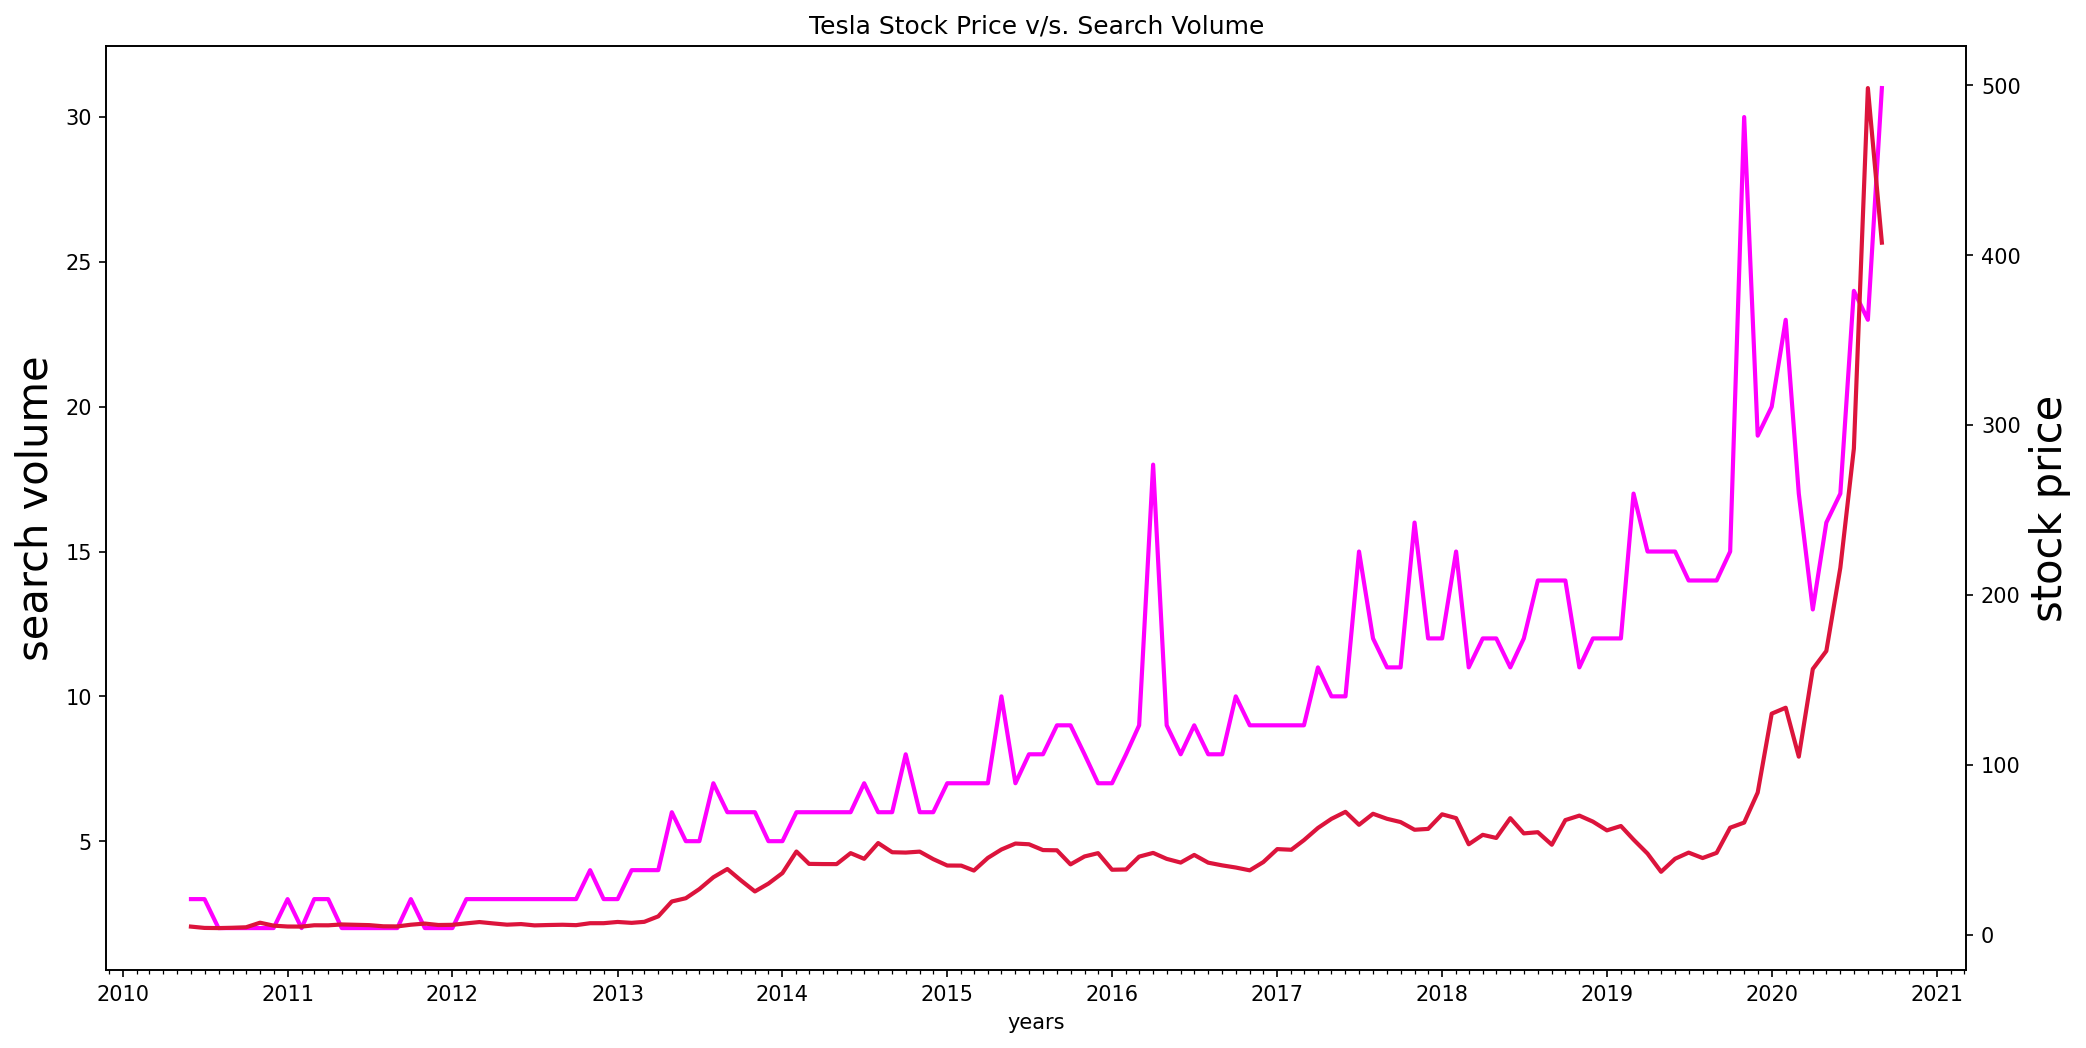

In [28]:

plt.figure(figsize = (16,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.xticks(fontsize = 14, rotation = 45)
plt.title("Tesla Stock Price v/s. Search Volume")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("search volume",fontsize = 20)
ax2.set_ylabel("stock price",fontsize = 20)

ax1.set_xlabel("years")

ax1.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH,linewidth = 2,color = "magenta")
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE,linewidth = 2,color = "crimson")

plt.show()



### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

In [20]:
df_btc_monthly.head()

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


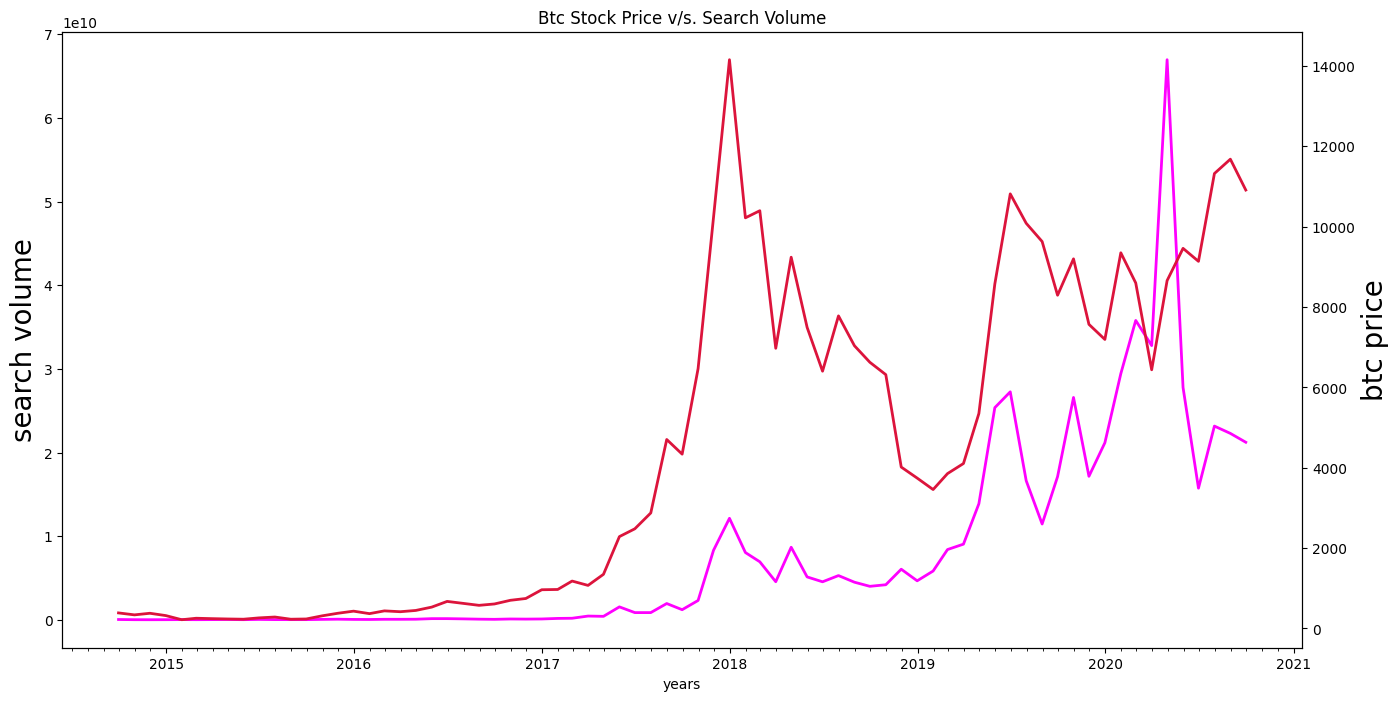

In [21]:

plt.figure(figsize = (16,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.xticks(fontsize = 14, rotation = 45)
plt.title("Btc Stock Price v/s. Search Volume")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("search volume",fontsize = 20)
ax2.set_ylabel( "btc price",fontsize = 20)

ax1.set_xlabel("years")

ax1.plot(df_btc_monthly.index,df_btc_monthly.VOLUME,linewidth = 2,color = "magenta")
ax2.plot(df_btc_monthly.index,df_btc_monthly.CLOSE,linewidth = 2,color = "crimson")

plt.show()



In [22]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

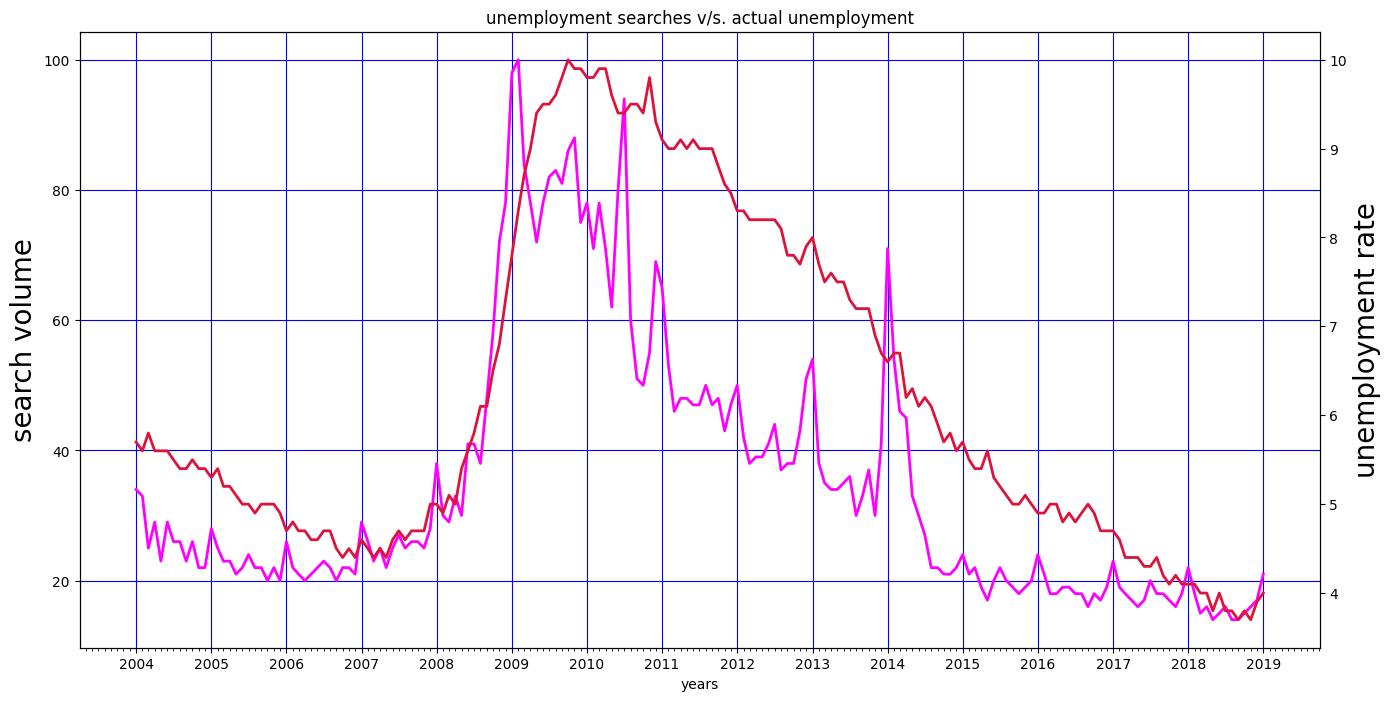

In [23]:
plt.figure(figsize = (16,8))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.grid(color = "blue")
plt.xticks(fontsize = 14, rotation = 45)
plt.title("unemployment searches v/s. actual unemployment")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("search volume",fontsize = 20)
ax2.set_ylabel( "unemployment rate",fontsize = 20)

ax1.set_xlabel("years")

ax1.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH,linewidth = 2,color = "magenta")
ax2.plot(df_unemployment.MONTH,df_unemployment.UNRATE,linewidth = 2,color = "crimson")

plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [24]:
rolling_df = df_unemployment[["UE_BENEFITS_WEB_SEARCH","UNRATE"]].rolling(window = 6).mean()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

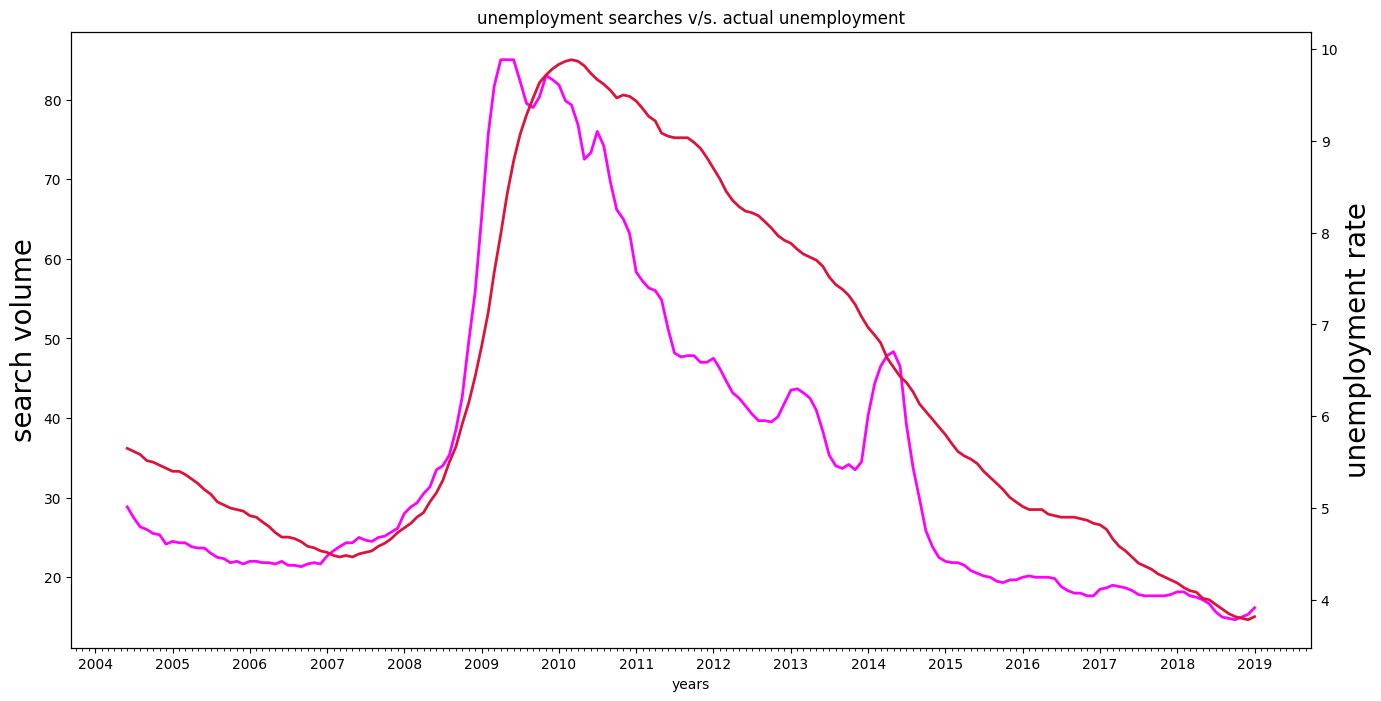

In [26]:
plt.figure(figsize = (16,8))
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.xticks(fontsize = 14, rotation = 45)
plt.title("unemployment searches v/s. actual unemployment")

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_ylabel("search volume",fontsize = 20)
ax2.set_ylabel( "unemployment rate",fontsize = 20)

ax1.set_xlabel("years")

ax1.plot(df_unemployment.MONTH,rolling_df.UE_BENEFITS_WEB_SEARCH,linewidth = 2,color = "magenta")
ax2.plot(df_unemployment.MONTH,rolling_df.UNRATE,linewidth = 2,color = "crimson")

plt.show()